# Group Project - CE903
# Fact Checking by using Wikipedia

file:///home/mushfika/Desktop/Factchecking.png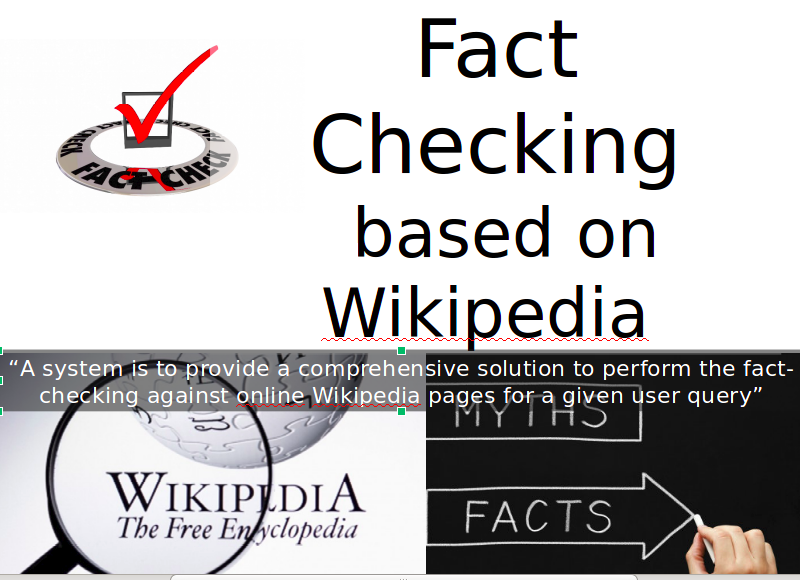
# Submitted by Group 6
# First version and Final Version (Excluding the Google Translation Part)

- Extract facts from wikipedia pages

# Automatically Identification  and Extraction of Facts (Statements) from a Wikipedia Page.



# Required package

- In order to run the below-mentioned code below packages are mandetory
 
  - spacy
  - textacy


- To install spacy please go through the below page
    
    - https://spacy.io/usage/

- For linux/ubuntu 
   - $pip install -U spacy 
   
- To install textacy go through the below-mentioned links

     - https://pypi.org/project/textacy/
     - https://media.readthedocs.org/pdf/textacy/stable/textacy.pdf
     


In [1]:
import nltk, re, requests
import spacy
import textacy.extract
from bs4 import BeautifulSoup
from nltk import pos_tag, ne_chunk
from spacy import displacy

spacy_eng_nlp_model = spacy.load('en_core_web_lg')

In [2]:
# Grab a perticular page from online wikipedia.

wiki_page = "Brexit"
extract_link = f"https://en.wikipedia.org/api/rest_v1/page/html/{wiki_page}"
#extract_link = f"https://en.wikipedia.org/wiki/{wiki_page}"

In [3]:
raw_data = requests.get(extract_link)

In [4]:
bsoup = BeautifulSoup(raw_data.text, "lxml")
extracted_text = bsoup.select("body")[0].get_text().strip()

In [5]:
# Identification of extraction of statement (can be treat as a fact) by using textacy.

texts = spacy_eng_nlp_model(extracted_text)
statements = textacy.extract.semistructured_statements(texts, wiki_page)
statements = list(statements)

print (statements)

[(Brexit, be, a factor for the slowdown in EU immigration), (Brexit, was, a warning for the EU), (Brexit, may be, good for terrorists and the Kremlin and bad for European security), (Brexit, is, only alternative to Chequers plan), (Brexit, are, the options), (Brexit, are, the options)]


In [6]:
#Process the text and strip out the [] from the text

def processing(txt):
    reg_exp = re.compile("\.?\[\d+\]?")
    txt = reg_exp.sub("", txt).strip()
    
    if txt[-1] == ".":
        txt = txt[0:-1]
        
    return txt

In [7]:
# Extract the fact

for fact_wiki in statements:
    subject, verb, fact = fact_wiki
    fact = processing(str(fact))
    print(f"{subject} {verb} {fact}.")

Brexit be a factor for the slowdown in EU immigration.
Brexit was a warning for the EU.
Brexit may be good for terrorists and the Kremlin and bad for European security.
Brexit is only alternative to Chequers plan.
Brexit are the options.
Brexit are the options.


In [8]:
for named_entity in texts.ents:
    print(f"{named_entity.text} ({named_entity.label_})")

Brexit (GPE)


 (PERSON)
March 2019 (DATE)


 (CARDINAL)
United Kingdom's (GPE)
the European UnionPart (ORG)
theUnited Kingdomin theEuropean Union (ORG)
1972 (DATE)
EC Act (LAW)
1973 (DATE)
EC (ORG)
1975 (DATE)

1975 Referendum Act
Results


Treaty (LAW)
Single European Act (LAW)
1986 (DATE)
UK (GPE)
Maastricht Treaty (LAW)
1992 (DATE)
UK (GPE)
Amsterdam Treaty (GPE)
1997 (DATE)
UK (GPE)
2001 (DATE)
UK (GPE)
Treaty of Lisbon (LAW)
2007 (DATE)
UK (GPE)
2011 (DATE)
UK Act (LAW)
EU Treaty (LAW)
EU (GPE)
British (NORP)
Proposed European Constitution (LAW)

European Union (ORG)
Bill 2004–05 (PERSON)
European Parliament (ORG)
1973–1979 (CARDINAL)
1979–1984 (CARDINAL)
1979 (DATE)
1984–1989 (CARDINAL)
1984 (DATE)
1989 (DATE)
1994–1999 (CARDINAL)
1994 (DATE)
1999–2004 (CARDINAL)
1999 (DATE)
2004–2009 (CARDINAL)
2004 (DATE)
2009–2014 (CARDINAL)
2009 (DATE)
2014 (DATE)

House of Lords EU Committee (ORG)

House of Commons EU Committee (ORG)
UK (GPE)

Northern Ireland Executive (ORG)
Brussels (GPE)

Omagh (GPE)
Northern Ireland (GPE)
EU (ORG)
£50 million (MONEY)
NHS (ORG)
EU (ORG)
EU (ORG)
Stuart Rose (PERSON)
Britain Stronger (PERSON)
Europe (LOC)
EU (ORG)
Conservatives (NORP)
Greens (NORP)
EU,[66 (ORG)
Europe (LOC)
2016 (DATE)
United Kingdom European Union (ORG)
the morning of (TIME)
24 June (DATE)
51.89 (CARDINAL)
the European Union (ORG)
48.11 per cent (MONEY)
European (NORP)
the UK Electoral Commission Referendum (ORG)
second (ORDINAL)
more than four million signatures,[72][73 (MONEY)
9 July.[74 (LOC)
United Kingdom European Union (ORG)
2016National (ORG)


Choice (PERSON)

% (PERCENT)
the European Union (ORG)
17,410,74251.89% (PERCENT)
the European Union (ORG)
16,141,24148.11% (PERCENT)

33,551,98399.92% (ORG)


Invalid (PERSON)
25,3590.08% (PERCENT)


 (CARDINAL)
33,577,342100.00% (PERCENT)
46,500,00172.21% (PERCENT)
51,356,76865.38% (PERCENT)
Source: Electoral Commission



 (ORG)
National (ORG)


 (CARDINAL)
17,410,742 (CARDINAL)
51.9% (PERCENT)
16,141,241 (CARDINAL)
48.1

Post (ORG)
50 (CARDINAL)
British (NORP)

European Union (Withdrawal (ORG)
2018 (DATE)

Main (ORG)
European Union (Withdrawal) Act (ORG)
October 2016 (DATE)
Theresa May (PERSON)
Great Repeal Bill (WORK_OF_ART)
the European Communities Act (LAW)
1972 (DATE)
UK (GPE)
EU (ORG)
the European Union (Withdrawal (ORG)
the House of Commons (ORG)
13 July 2017.[165 (DATE)
12 September 2017 (DATE)
first (ORDINAL)
second (ORDINAL)
326 (CARDINAL)
290 (CARDINAL)
House (ORG)
Commons.[166 (ORG)
Houses of Parliament (ORG)
Act (LAW)
26 June 2018 (DATE)
the European Council (ORG)
29 June (DATE)
States and Union (ORG)
The Withdrawal Act (LAW)
21 January 2019 (DATE)
UK (GPE)
EU (ORG)
UK (GPE)
EU (ORG)
Parliament (ORG)
Brexit (GPE)
two-year (DATE)
Article 50 (LAW)
29 March 2019 (DATE)
UK (GPE)
The Withdrawal Act (LAW)
June 2018 (DATE)
March 2017 (DATE)
the Institute for Government (ORG)
the European Union (Withdrawal (ORG)
as many as 15 (CARDINAL)
Brexit Bills (ORG)
Parliamentary (WORK_OF_ART)
2016 (DATE)
201

the National Health Service ( (ORG)
NHS (ORG)
British (NORP)
EU (ORG)

Main (ORG)
Brexit (FAC)
2016 (DATE)
Ken Mayhew (PERSON)
Education (ORG)
Oxford University (ORG)
Brexit (GPE)
EU (ORG)
EU (ORG)
EU (ORG)
UK (GPE)
UK (GPE)
EU (ORG)
just over 10% (PERCENT)
EU (ORG)
August (DATE)
2016.[288 (FAC)
British (NORP)
UK (GPE)
the European Research Area (ORG)
UK (GPE)

Sports (ORG)
Brexit (FAC)
Brexit (GPE)
EU (ORG)
EEA (ORG)
UK (GPE)
Brexit (FAC)
Brexit (GPE)
EU (ORG)
players.[291][292 (PERSON)
Scotland Nicola Sturgeon (ORG)
Brexit (GPE)
Scotland (GPE)
Europe (LOC)
Bute House (FAC)
the Scottish Government (ORG)
First (ORDINAL)
Scotland (GPE)
Scotland (GPE)
the European Union (ORG)
England (GPE)
Wales (GPE)
March 2017 (DATE)
SNP (ORG)
First (ORDINAL)
Nicola Sturgeon (PERSON)
second (ORDINAL)
Scottish (NORP)
2018 (DATE)
2019 (DATE)
Britain (GPE)
EU).[295 (PERSON)
UK (GPE)
the Scottish Parliament (ORG)
28 March 2017 (DATE)
Scotland (GPE)
First (ORDINAL)
Sturgeon (PERSON)
Scotland (GPE)
Scotland 

2% (PERCENT)
966 (CARDINAL)

Conservative Party (ORG)


 (PERSON)
6 Jul 2018 (TIME)
The UK Cabinet (ORG)
Chequers (ORG)
UK (GPE)


 (PERSON)
Jul 2018 (PERSON)
41% (PERCENT)
46% (PERCENT)
13% (PERCENT)
1,641 (CARDINAL)
25–26 (CARDINAL)
43% (PERCENT)
46% (PERCENT)
11% (PERCENT)
3% (PERCENT)
1,645 (CARDINAL)
Jun 2018 (PERSON)
44% (PERCENT)
45% (PERCENT)
1,663 (CARDINAL)
18–19 (CARDINAL)
Jun 2018 (DATE)
43% (PERCENT)
44% (PERCENT)
13% (PERCENT)
1,606 (CARDINAL)
11–12 (CARDINAL)
Jun 2018 (PERSON)
43% (PERCENT)
46% (PERCENT)
12% (PERCENT)
3% (PERCENT)
1,638 (CARDINAL)
Jun 2018 (PERSON)

44% (PERCENT)

 (WORK_OF_ART)
44% (PERCENT)
13% (PERCENT)
1,619 (CARDINAL)
May 2018 (DATE)
40% (PERCENT)
47% (PERCENT)
13% (PERCENT)
1,670 (CARDINAL)
May 2018 (DATE)
43% (PERCENT)
44% (PERCENT)
13% (PERCENT)
1,660 (CARDINAL)
May 2018 (DATE)
44% (PERCENT)
45% (PERCENT)
1,634 (CARDINAL)
May 2018 (DATE)
43% (PERCENT)
45% (PERCENT)
1,648 (CARDINAL)
30 (CARDINAL)
May 2018 (DATE)
42% (PERCENT)
47% (PERCENT)
11% (PE

The Closed Circle (WORK_OF_ART)
2004 (DATE)
2010 (DATE)
2011 (DATE)
the 2012 Olympics (EVENT)
2016 (DATE)

Theatre
 (PRODUCT)
June 2017 (DATE)
the National Theatre in London (ORG)
Carol Ann Duffy (PERSON)
My Country (ORG)
Britannia (GPE)
British (NORP)
Duffy (PERSON)
National Theatre (FAC)
the UK Arts Councils (ORG)
London (GPE)
England (GPE)
EU (GPE)
Dominic Cavendish (PERSON)
The Daily Telegraph (ORG)
2016 (DATE)
Martin Durkin (PERSON)
Brexit (ORG)
the United Kingdom (GPE)
the European Union (ORG)
Wag TV (ORG)
300,000.[445 (MONEY)
Kickstarter (ORG)
50,000 (MONEY)
Spitfire Capital.[citation (ORG)
May 2016 (DATE)
Leicester Square (FAC)
Nigel Farage (PERSON)
David Davis (PERSON)
State for Exiting the European Union (ORG)
2018 (DATE)
Postcards (PRODUCT)
the 48% (PERCENT)
the 48% (ORG)
27 (CARDINAL)
EU (GPE)
States (GPE)
British (NORP)
James Graham (PERSON)
Toby Haynes (PERSON)
Brexit (ORG)
The Uncivil War (EVENT)
Brexit (ORG)
US (GPE)
January (DATE)
2016 (DATE)
the United Kingdom (GPE)
t

Owen (PERSON)
Mason (PERSON)
Rowena (PERSON)
Asthana (PERSON)
Anushka (PERSON)
24 January 2017 (DATE)
Supreme (ORG)
Guardian (ORG)
9 (CARDINAL)
Brexit (FAC)
50 (CARDINAL)
BBC (ORG)
1 (CARDINAL)
February 2017 (DATE)
1 (CARDINAL)
50 (CARDINAL)
Brexit (ORG)
BBC News (ORG)
28 March 2017 (DATE)
28 (CARDINAL)
Tusk, Donald [@eucopresident (ORG)
29 March 2017 (DATE)
50 (CARDINAL)
#Brexit (MONEY)
↑   (LAW)
Stamp (PERSON)
Gavin (PERSON)
Hunt (PERSON)
Alex (PERSON)
28 (CARDINAL)
March 2017 (DATE)
Theresa May (WORK_OF_ART)
Brexit (FAC)
BBC News (ORG)
29 (CARDINAL)
Szyszczak (GPE)
Erika (PERSON)
Lydgate (PERSON)
Emily (PERSON)
10 October 2016 (DATE)
50 (CARDINAL)
UK (GPE)
University of Sussex (ORG)
ISBN (ORG)
978 (CARDINAL)
18 (CARDINAL)
November 2017 (DATE)
Article 50 TEU (LAW)
State (ORG)
Brexit (GPE)
Brexit (GPE)
21 (CARDINAL)
Article 50 (LAW)
all EU27 (ORG)
the United Kingdom's (GPE)
10 April 2017 (DATE)
European Parliament (ORG)
10 April 2017 (DATE)
26 (CARDINAL)
Owen (PERSON)
16 November 2018

Oltermann (PERSON)
Philip (PERSON)
Scammell (ORG)
Rosie (PERSON)
Darroch (GPE)
Gordon (PERSON)
8 July 2016 (DATE)
Brexit (FAC)
EU (ORG)
Guardian (ORG)
12 (CARDINAL)
July (DATE)
Asthana (PERSON)
Anushka (PERSON)
Walker (PERSON)
Peter (PERSON)
19 April 2017 (DATE)
Theresa (ORG)
May (DATE)
Brexit (ORG)
Guardian (ORG)
19 April (DATE)
2017 (DATE)
Brexit (GPE)
BBC News (ORG)
28 April 2017 (DATE)
29 (QUANTITY)
Anushka Asthana (PERSON)
24 April 2017 (DATE)
Brexit (FAC)
Guardian (ORG)
25 April (DATE)
2017 (DATE)
EU (ORG)
BBC News (ORG)
25 April 2017 (DATE)
25 April (DATE)
Lib Dems (WORK_OF_ART)
Hard Brexit (FAC)
Herald (PERSON)
18 April 2017 (DATE)
23 April (DATE)
Green Party (ORG)
Caroline Lucas (PERSON)
second (ORDINAL)
EU (ORG)
The Independent (ORG)
2 September 2016 (DATE)
19 April (DATE)
Lib Dem leader (WORK_OF_ART)
Tim Farron (PERSON)
Theresa May's (ORG)
Independent (ORG)
18 April 2017 (DATE)
19 April (DATE)
Scotland (GPE)
1 June 2017 (DATE)
13 (CARDINAL)
BBC News (ORG)
30 (CARDINAL)
May 2

Philip (PERSON)
Ortega-Argilés (ORG)
Raquel (PERSON)
Thissen (PERSON)
Mark (PERSON)
van Oort (PERSON)
Frank (PERSON)
2017 (DATE)
Brexit (GPE)
Channel (NORP)
97 (CARDINAL)
25–54 (CARDINAL)
1435 (DATE)
Steven Swinford (PERSON)
10 August 2016 (DATE)
Britain (GPE)
up to £ (CARDINAL)
the Single Market (ORG)
Brexit (GPE)
11 August (DATE)
Brexit (ORG)
Financial Times (ORG)
4 (CARDINAL)
October 2016 (DATE)
19 August 2013 (DATE)
October (DATE)
At least 12 (CARDINAL)
London (GPE)
Dublin (GPE)
Brexit (GPE)
John (PERSON)
1 March 2017 (DATE)
Brexit (ORG)
Oxford Review of Economic Policy (ORG)
33 (CARDINAL)
Portes (PERSON)
Jonathan (PERSON)
Forte (PERSON)
Giuseppe (PERSON)
1 March 2017 (DATE)
Brexit (ORG)
Oxford Review of Economic Policy (ORG)
33 (CARDINAL)
Mervyn King (GPE)
Britain (GPE)
Brexit (GPE)
Guardian (ORG)
26 (CARDINAL)
December 2016 (DATE)
1 November 2017.1 (DATE)
2 3 4 (DATE)
the year (DATE)
Bank of England – Central Banking (ORG)
Central Banking (ORG)
16 (CARDINAL)
February 2017 (DATE)


the Sea Ports (FAC)
Channel (NORP)
North Sea (LOC)
The Stationery Office (ORG)
4 February 2003 (DATE)
12 January 2008 (DATE)
5 (CARDINAL)
July 2016 (DATE)
This Treaty (PRODUCT)
two years (DATE)
Buchanan (PERSON)
Elsa (PERSON)
30 June 2016 (DATE)
François Hollande (PERSON)
Le Touquet (FAC)
Calais (ORG)
UK (GPE)
Brexit (FAC)
International Business Times (ORG)
4 (CARDINAL)
Williams (PERSON)
Jennifer (PERSON)
24 June 2016 (DATE)
Brexit (FAC)
300-year-old (DATE)
Britain (GPE)
Spain (GPE)
Vox (PERSON)
26 (CARDINAL)
June (DATE)
Harry Cockburn (PERSON)
28 (CARDINAL)
May 2016 (DATE)
Brexit (ORG)
Gibraltar (GPE)
Independent (ORG)
26 October 2018.↑ (DATE)
Brexit (GPE)
Spain (GPE)
Gibraltar (GPE)
BBC News (ORG)
26 June (DATE)
Joe Duggan (PERSON)
12 September 2016 (DATE)
Fabian Picardo (PERSON)
British (NORP)
British (NORP)
National Day (EVENT)
Brexit (FAC)
Gibraltar (GPE)
UK (GPE)
Gibraltar (GPE)
UK (GPE)
EU (ORG)
Gibraltar (GPE)
Theresa May (WORK_OF_ART)
6 April 2017 (DATE)
UK (GPE)
Gibraltar (GP

Renegotiation of EU Membership (ORG)
Oxford (ORG)
Hart Publishing (ORG)
ISBN (ORG)
978 (CARDINAL)
874 (CARDINAL)
OCLC (ORG)
917161408 (DATE)
Ivan (PERSON)
2019 (DATE)
9 (CARDINAL)
Brexit (GPE)
London (GPE)
ISBN (ORG)
978 (CARDINAL)


 (CARDINAL)
External (ORG)


Brexitat Wikipedia's (PERSON)
Wiktionary
Media (ORG)
Wikimedia Commons
News (ORG)
Wikisource
Resources (ORG)
Wikiversity
Data (ORG)
Wikidata



 (ORG)
UK (GPE)
Brexit (FAC)
UK (GPE)

European Parliament - Brexit (ORG)
Protocol (LAW)
Ireland (GPE)
Northern Ireland (GPE)
13 (CARDINAL)
November 2018 (DATE)
UK (GPE)
14 November 2018 (DATE)

House of Lords (ORG)
Withdrawal Agreement (ORG)
5 December 2018 (DATE)

EU's (ORG)

UK Parliament – (ORG)
EU Referendum (ORG)
Parliament (ORG)
the Devolved Assemblies – House of Commons Library (ORG)
Brexit (GPE)
Northern Ireland (GPE)
Scotland (GPE)
Wales (GPE)
– House of Commons Library (ORG)
UK (GPE)
Brexit (GPE)
10 October 2016 (DATE)
BBC (ORG)
Brexit (GPE)
17 December 2018 (DATE)
The Brexit

In [9]:
# NE Visualization of whole document (For Document 1)

displacy.render(texts, jupyter=True, style='ent')



# First Version


# Required packages

 In order to run the below-mentioned code below package is mandetory
 
  - wikipedia
  - To install wikipedia nltk packages use below command
    - pip install wikipedia
  - For more detail please go through the below link
    - https://pypi.org/project/wikipedia/


- For more information about nltk ne_chunk go through the below links
   - https://www.nltk.org/api/nltk.chunk.html
   - https://www.kaggle.com/nltkdata/maxent-ne-chunker
- To understand how perception tagger works please go through the below link.
  - http://www.nltk.org/_modules/nltk/tag/perceptron.html
  
   


# How the program works

- The program is divided into two parts which are as follows.
  - Named Entity Extraction from the fact
  - Verify the fact using the on-line Wikipedia
  
  
  
# Named Entity Extraction from the fact

- The program starts working with the fact (provided by the user).
- The fact provided by the user is passed to the named entity extraction method of Fact class. 
  The processing of given fact begins in this step.
- Tokenized the fact using nltk.word_tokenize. After that tokenized fact passed to nltk.pos_tag for POS Tag.
- After pre-processing (tokenization with POS Tag) of fact, it will use nltk ne_chunk method to return a 
  tree of named entity.
- Later it will pass to continuous chunk to extract the NE from the tree 
  (for more detail how it works please go through the below link 
  https://www.programcreek.com/python/example/91258/nltk.ne_chunk) 
- NER for given facts end here.  


# Verify the fact using the on-line Wikipedia

- Once the named entity extraction from the facts (provided by the user) is done, the program fetches the
  Wikipedia pages for every entity of the fact (based on the user input) and stores all relevant 
  pages in the memory.  
- When the necessary fetching is completed, the program will check whether the named entities of the fact 
  occur on the same page or not.
- After that it calculates the ratio between the common occurrences of both NEs and all comparisons for NEs.
  If the ratio is more than 0.80, the program will return the positive result otherwise it will 
  return negative result.
  
  Whole Working process can be summarized as follows
  file:///home/mushfika/Desktop/Version%20one.png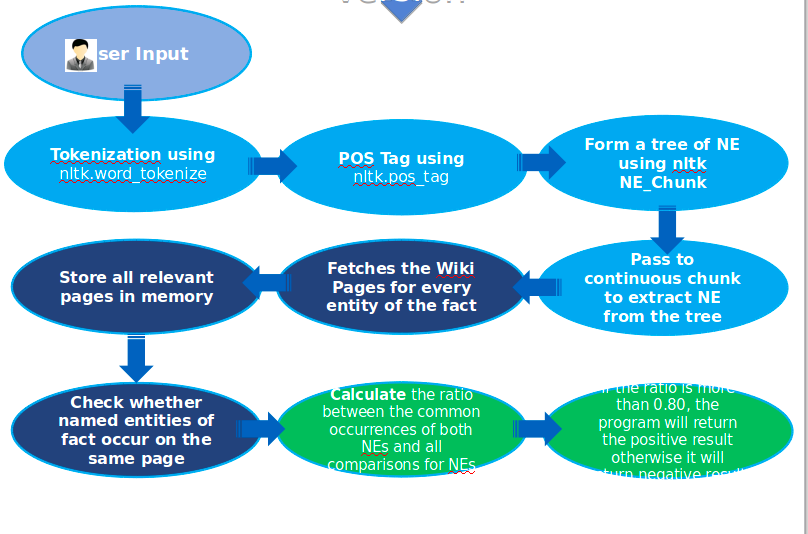
  
  
  
  
- Drawbacks of the program
  Below are some major drawbacks related to the program
   - If the NEs present in more than one Wikipedia pages, the program will return 0 as it will not able to 
     decide which page need to fetch from the cache. 
   - For NEs of same pages it will always return 1 regardless the actual realization between them. 
   
   

In [10]:
import wikipedia
import nltk
import csv
from nltk.tree import Tree
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mushfika/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/mushfika/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/mushfika/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/mushfika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
class NamedEntityExtractionOfFact:
    def __init__(self):
        pass

    def extract_named_entities_fact(self, sentence):
        sentence_processing = self.sentences_pre_processing(sentence)

        ne_chunks = nltk.ne_chunk(sentence_processing, binary=True)
        list_of_named_entities = self.get_continuous_chunks(ne_chunks)
        
        #print(ne_chunks)
        #print(list_of_named_entities)

        return list_of_named_entities

    # Tokenize and POS for the Facts
    def sentences_pre_processing(self, sentence):
        sentence = sentence.replace('\'', ' ')
        sentence = nltk.word_tokenize(sentence)
        sentence = nltk.pos_tag(sentence)

        return sentence
    
    
   # Identify the NEs and form a tree of NEs for the preprossed facts
    @staticmethod
    def get_continuous_chunks(chunk):
        continuous_chunk = []
        current_chunk = []

        for c in chunk:
            # Create a tree for NEs
            if type(c) == Tree:
                current_chunk.append(" ".join([token for token, pos in c.leaves()]))
            elif current_chunk:
                named_entity = " ".join(current_chunk)
                if named_entity not in continuous_chunk:
                    continuous_chunk.append(named_entity)
                    current_chunk = []
            else:
                continue

        if continuous_chunk:
            named_entity = " ".join(current_chunk)    
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)

        return continuous_chunk   # Extract the NEs from the tree

    def process_fact(self, fact):
        self.extract_named_entities_fact(fact)

In [12]:
# Identify and store the relevant wikipedia pages in the memory for every NEs of the fact

class WikipediaPageExtraction:

    def __init__(self):
        self.cache_wiki = {}
        pass

    def cached_wikipage_entity(self, entity):
        wikipages = None
        if entity in self.cache_wiki:
            wikipages = self.cache_wiki[entity]
        else:
            try:
                wikipages = wikipedia.page(entity)
            except wikipedia.exceptions.DisambiguationError:
                print("Disambiguation error: " + entity)
                wikipages = None
            except:
                print("Exception Occured : " + entity)
                wikipages = None

            self.cache_wiki[entity] = wikipages

        return wikipages


In [13]:
class FactCheckingUsingWikiPages:
    def __init__(self):
        self.fact_named_entity_extraction = NamedEntityExtractionOfFact()
        self.wikipedia_page_extractor = WikipediaPageExtraction()
        pass

    def fact_checking(self, fact):

        # get named entities
        named_entities = self.fact_named_entity_extraction.extract_named_entities_fact(fact)

        named_entities_with_pages = {}

        for entity in named_entities:
            named_entities_with_pages[entity] = self.wikipedia_page_extractor.cached_wikipage_entity(entity)

        count_of_common_occurence = 0
        total_num_of_occurences = 0
        entities_comparison = set()

        
        # Identify whether the NEs are from same pages
        for wiki_entity in named_entities:
            for fact_entity in named_entities:

                wiki_page = named_entities_with_pages[wiki_entity]

                if wiki_page is None:
                    continue

                wiki_and_fact_entities = wiki_entity + ',' + fact_entity
                wiki_and_fact_entities_reverse = fact_entity + ',' + wiki_entity

                if wiki_entity != fact_entity and not wiki_and_fact_entities in entities_comparison:

                    # check if entities exist together
                    if fact_entity in wiki_page.content:
                        count_of_common_occurence += 1

                    total_num_of_occurences += 1
                    entities_comparison.add(wiki_and_fact_entities)
                    entities_comparison.add(wiki_and_fact_entities_reverse)

        if total_num_of_occurences == 0:
            return 0.0
            
        #Calculate the ratio
        percentage_of_similarity = count_of_common_occurence / total_num_of_occurences

        if percentage_of_similarity > 0.8:
            return 1.0
            
        
            
            
        else:
            return 0.0
            
# Read the input files (Facts provided by the user)

def main():
    inputfile = "fact.tsv"
    fact_checking_wiki = FactCheckingUsingWikiPages()

    with open(inputfile, encoding="latin-1") as tsvfile:
        next(tsvfile)
        reader = csv.reader(tsvfile, delimiter='\t')
        
        i = 0

        for row in reader:
            if len(row) < 2:
                continue
            id = int(row[0])
            fact = row[1]

            estimated_val = float(fact_checking_wiki.fact_checking(fact))
            i += 1
            print(str(i) + ": " + str(estimated_val))
            


if __name__ == "__main__":
    main()

Exception Occured : 
1: 1.0
2: 1.0
3: 0.0
4: 1.0
5: 1.0
6: 1.0
7: 0.0
8: 1.0
Exception Occured : Barac Oobama
9: 0.0
10: 1.0
11: 0.0
12: 1.0
13: 1.0
14: 0.0
15: 1.0
16: 1.0


/home/mushfika/anaconda3/lib/python3.6/site-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/mushfika/anaconda3/lib/python3.6/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Disambiguation error: Hard
17: 0.0
18: 1.0
19: 1.0
Exception Occured : Poison Belt
20: 0.0
21: 1.0
22: 0.0
23: 0.0
24: 1.0
25: 1.0
26: 1.0
27: 0.0
28: 1.0
29: 1.0
Exception Occured : Sighetu Marma
30: 1.0
31: 1.0
32: 1.0
33: 1.0
34: 0.0
35: 1.0
36: 0.0
Disambiguation error: Urth
37: 0.0
Disambiguation error: Hendersonville
38: 0.0
39: 0.0
40: 1.0
41: 0.0
Disambiguation error: Paul
Exception Occured : Zeeland
42: 0.0
43: 0.0
44: 1.0
Disambiguation error: Maria
Disambiguation error: Neves
45: 0.0
Disambiguation error: Lafayette
46: 0.0
47: 0.0
48: 0.0
49: 1.0
50: 0.0
51: 1.0
52: 1.0
53: 1.0
54: 0.0
55: 1.0
56: 1.0
57: 0.0
58: 1.0
59: 0.0
60: 1.0
61: 0.0
62: 0.0
63: 1.0
64: 1.0
65: 0.0
66: 0.0
67: 1.0
68: 0.0
69: 1.0
70: 1.0
71: 1.0
72: 1.0
73: 1.0
74: 1.0
75: 1.0
76: 0.0
77: 1.0
78: 1.0
79: 1.0
80: 1.0
Exception Occured : Greenest Cities
81: 1.0
82: 1.0
Disambiguation error: Christian
83: 1.0
84: 1.0
85: 0.0
86: 1.0
87: 1.0
88: 1.0
89: 1.0
90: 1.0
91: 1.0
92: 0.0
93: 1.0
94: 1.0
95: 1.0


# Final Version

file:///home/mushfika/Desktop/Screenshot%20from%202019-03-20%2011-54-48.png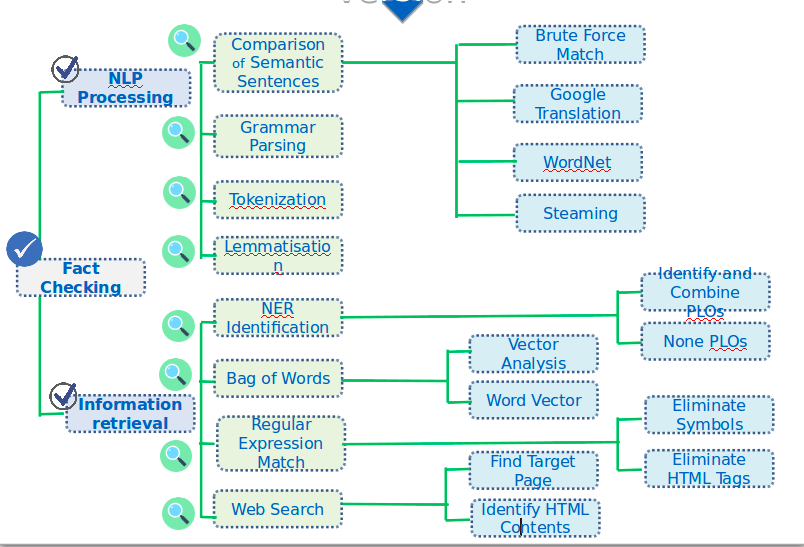



In [14]:
import re
import os
import nltk
import numpy as np
import pandas as pd
import csv, xlrd
from urllib import request
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from bs4.element import Tag
from nltk.corpus import wordnet as wn
from itertools import chain, groupby
from nltk.tag import StanfordNERTagger
from nltk.stem import WordNetLemmatizer


In [15]:
wikipedia_base = 'https://en.wikipedia.org/wiki/'
#pronoun = ['he', 'she', 'his', 'her', 'their', 'He', 'She', 'His', 'Her', 'Their']
negtive_words = ['no', 'not']


def open_target_url(subject):
    return wikipedia_base + subject

def obtain_target_text(url):
    try:
        html = request.urlopen(url).read().decode('utf-8')
        bs = BeautifulSoup(html, features = 'html.parser')
        attrs = {"class": 'mw-parser-output'}
        need = bs.find(name = 'div', attrs = attrs)
        raw_text = ''
        for tag in need.contents:
            if tag.name == 'p' :
                raw_text += tag.text.strip() + '\n'
        header = ''
        stat = []
        counter = 0
        for tag in need.contents:
            if tag.name == 'table':
                for tbody in tag.contents:
                    if tbody.name == 'tbody':
                        for tr in tbody:
                            features = ''
                            contents = ''
                            if tr.name == 'tr': 
                                for th in tr:                 
                                    if th.name == 'th':
                                        if counter == 0:
                                            header = th.text
                                            counter += 1
                                        else:
                                            features = re.sub('\n', ' ', th.text)
                            
                                    if th.name == 'td':
                                        contents = re.sub('\n', ' ', th.text)
                                stat.append(header + ' is ' + features + ' of ' + contents + '.\n')  
        raw_text += ''.join(stat)
        return raw_text
    except Exception as e:
        print('Can not find the target page in Wikipeadia.',url)
        return

    
def nerInNLTK(text):
    text1 = re.sub('(\.|\'s|\')', '', text)
    try:
        st = StanfordNERTagger('.//NER_//english.all.3class.distsim.crf.ser.gz', './/NER_//stanford-ner.jar')
        result = st.tag(text1.split())
        return result
    except Exception as e:
        print('did not detect any person, organization or location, please check.')

def combo_ners(word_with_tags):
    entities = []
    relations = []
    for tag, chunk in groupby(word_with_tags, lambda x: x[1]): 
        if tag != 'O':      
            entities.append((tag, " ".join(w for w, t in chunk)))
        else:
            relations.append((tag, " ".join(w for w, t in chunk)))
    #print(entities)
    #print(relations)
    entities1 = []
    for entitie in entities:
        if entitie[0] == 'PERSON':
            entities1.append( ('PERSON',re.sub('(\.|\'s|\')', '', entitie[1])))
        if entitie[0] == 'LOCATION':
            entities1.append(('LOCATION', re.sub('\.', '', entitie[1])))
            
    return (entities1, relations)


def eliminate_symbols(inpt):
    return re.sub(r'[^\w]', ' ', inpt)
def eliminate_symbols_1(inpt):
    return re.sub(r'[^\w]', '', inpt)
def eliminate_annotations(inpt):
    return re.sub(r'\[\S*\]', '', inpt)


def pre_process(sent):
    key_facts = []
    sent_token = nltk.word_tokenize(sent)
    pos_taged = nltk.pos_tag(sent_token)
    for word, tag in pos_taged:
        if tag.startswith('N') or tag.startswith('J') or tag.startswith('V') or tag.startswith('R')or tag.startswith('C'):
            key_facts.append(word)
    return key_facts


def find_similar_word(pure_key_word):
    simis_word = []
    for word in pure_key_word:
        synsets = wn.synsets(word)
        for syn in synsets:
            for sy in syn.lemmas():
                simis_word.append(sy.name())
    simis_word += pure_key_word 
    return set(simis_word)

# natural language process . para1: the sequence of the html store in the url.txt

def pre_process1(words):
    sent_token = nltk.word_tokenize(words)
    patterns= [(r'.*ing$','VBG'),(r'.*ed$','VBD'),(r'.*es$','VBZ'),(r'.*ould$','MD'),\
           (r'.*\'s$','NN$'),(r'.*ly$','RB'),(r'.*s$','NNS'),(r'^-?[0-9]+(.[0-9]+)?$','CD'),(r'.*','NN')]
    regexp_tagger = nltk.RegexpTagger(patterns)
    pos_taged = regexp_tagger.tag(sent_token)
    wnl = WordNetLemmatizer()
    after = []
    for lemma in pos_taged:
        if lemma[1].startswith('N'):
            after.append(wnl.lemmatize(lemma[0],'n'))
            continue
        if lemma[1].startswith('J'):
            after.append(wnl.lemmatize(lemma[0], 'a'))
            continue
        if lemma[1].startswith('V'):
            after.append(wnl.lemmatize(lemma[0], 'v'))
            continue
        if lemma[1].startswith('R'):
            after.append(wnl.lemmatize(lemma[0], 'r'))
            continue
        else:
            after.append(wnl.lemmatize(lemma[0]))
    return after


def key_word_match(needed_text, entities, facts, confident_threshold):
    matched_sentences = []
    sentences = sent_tokenize(needed_text)
    pre_suf = entities.split()
    pre_suf.append(entities)
    pure_key_word = [fact for fact in facts if fact not in pre_suf]
    simis_word = find_similar_word(pure_key_word)
    for sentence in sentences:
        had_matched_word = []
        words = pre_process1(sentence)
        for word in words:
            if  word in simis_word:
                    had_matched_word.append(word)
        matched_lenth = len(set(had_matched_word))
        confidence = matched_lenth - confident_threshold
        neg_matched = [neg for neg in negtive_words if neg in had_matched_word]
        neg_input = [neg for neg in negtive_words if neg in facts]
        if len(pure_key_word) <= confidence and neg_input == neg_matched:
            matched_sentences.append(sentence)
            print('Mathched ',matched_lenth, 'keywords on:', ' '.join(words))
            print('Mathched words: ', set(had_matched_word))
    return matched_sentences        

# Imports the Google Cloud client library

from google.cloud import translate

def translation(traget_lan, sentence):    
    # Instantiates a client
    translate_client = translate.Client()
    # The text to translate
    text = sentence
    # Translates some text into Chinese
    translation = translate_client.translate(text, target_language=traget_lan)
    print(u'Translation: {}'.format(translation['translatedText']))
    return translation['translatedText']


def compare_translation_sent(sent1, sent2):
    sents1 = eliminate_symbols_1(sent1)
    sents2 = eliminate_symbols_1(sent2)
    sents_array_1 = [i for i in sents1]
    sents_array_2 = [j for j in sents2]
    counter = 0
    chunk_match_length = []
    for i in range(len(sents_array_2)):
        for j in range(len(sents_array_1)):
            if i <= (len(sents_array_2) - 1):
                if sents_array_2[i] == sents_array_1[j]:
                    counter += 1
                    chunk_match_length.append(counter) 
                    i += 1
                    continue
                else:
                    counter = 0
                    continue
    if len(chunk_match_length) > 0:
        match_accuracy = sorted(chunk_match_length, reverse = True)[0] / len(sents_array_2)
    else:
        match_accuracy = 0
    return match_accuracy    

# please use pip install xlrd here.
def read_csv_files(file_name):
    df = pd.read_excel(os.getcwd() +'//'+ file_name)
    stat = ['Fact_Statement']
    target = df[stat].values.astype(str).tolist()
    target1 = np.array(target).flatten()
    return target1
stat_lines = read_csv_files('Fact_Checking.xlsx')       
 
for line in stat_lines:
    print(line)
    #inputs_trans = translation('zh-CN', line)
    key_facts = pre_process(line)
    key_facts1 = pre_process1(' '.join(key_facts))
    # recognize person, location and org
    ners = nerInNLTK(line)
    entities = combo_ners(ners)[0]
    sent_mean = {}
    counter = 0;
    for entitie in entities:
        target_url = open_target_url(entitie[1])
        target_text = obtain_target_text(target_url)
        if target_text == None:
            break
        target_text_1 = eliminate_annotations(target_text)
        matched_sentences = key_word_match(target_text_1, entitie[1], key_facts1, 0)
        if len(matched_sentences) > 0:
            for sent in range(len(matched_sentences)):
                counter += 1
                print('Matched ', counter, ': ', matched_sentences[sent])
        else:
            print("No Matches", 'in Wikipedia page of', '\"', entitie[1],'.\"')
         
    print()


#for sent in matched_sentences:
    #matched_trans = translation('zh-CN', sent)
    #mean_similarity = compare_translation_sent(matched_trans, inputs_trans)
    #sent_mean[sent] = mean_similarity
    #max_mean = sorted(sent_mean.items(), key=lambda item: item[1], reverse=True)[0]
    #if float(max_mean[1]) > 0.21 and counter == 0:
        #counter += 1
        #print('Matched the sentence with max semantic similarity of :', max_mean, end='\n\n')
    #else:
        #print('You maybe worng!', end='\n\n')
    
    

Ivana Trump is the first wife of Donald Trump.
Mathched  4 keywords on: Ivana Marie Trump ( née Zelníčková ; Czech : , born February 20 , 1949 ) is a Czech former model and businesswoman , who wa the first wife of Donald Trump .
Mathched words:  {'wife', 'Donald', 'is', 'first'}
Matched  1 :  
Ivana Marie Trump (née Zelníčková; Czech: , born February 20, 1949) is a Czech former model and businesswoman, who was the first wife of Donald Trump.
No Matches in Wikipedia page of " Donald Trump ."

Ivana Trump is the second wife of Barak Obama.
No Matches in Wikipedia page of " Ivana Trump ."
No Matches in Wikipedia page of " Barak Obama ."

The UK has a pertially regulated market economy.
No Matches in Wikipedia page of " UK ."

Barak Obama born August 4, 1961.
Mathched  4 keywords on: Barack Hussein Obama II ( /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ ( listen ) ; born August 4 , 1961 ) is an American attorney and politician who serve a the 44th president of the United States from 2009 to 2017 .
Mathched

Matched  1 :  London was the focus of the Peasants' Revolt in 1381.

London was also a centre of England's Jewish population before their expulsion by Edward I in 1290.
Mathched  9 keywords on: London wa also a centre of England 's Jewish population before their expulsion by Edward I in 1290 .
Mathched words:  {'wa', 'population', 'Edward', 'Jewish', 'centre', 'expulsion', 'England', 'also', '1290'}
Matched  1 :  London was also a centre of England's Jewish population before their expulsion by Edward I in 1290.
No Matches in Wikipedia page of " England ."
No Matches in Wikipedia page of " Edward I ."

London was still very compact.
Mathched  4 keywords on: By the end of the Tudor period in 1603 , London wa still very compact .
Mathched words:  {'compact', 'very', 'still', 'wa'}
Matched  1 :  By the end of the Tudor period in 1603, London was still very compact.

London was the world's largest city from c.1831 to 1925.
Mathched  6 keywords on: According to Samuel Johnson : London wa the

No Matches in Wikipedia page of " Europe ."

London is not the capital of England, as England does not have its own government.
No Matches in Wikipedia page of " London ."
No Matches in Wikipedia page of " England ."

London is World's Most Expensive City | PropertyTime.
Mathched  7 keywords on: [ note 2 ] London is consider to be one of the world 's most important global cities and ha been term the world 's most powerful , most desirable , most influential , most visit , most expensive , innovative , sustainable , most investment friendly , most popular for work , and the most vegetarian friendly city in the world .
Mathched words:  {'most', 'city', 'be', 'expensive', 'world', 'is', 'global'}
Matched  1 :  [note 2]
London is considered to be one of the world's most important global cities  and has been termed the world's most powerful,  most desirable, most influential, most visited, most expensive, innovative, sustainable, most investment friendly, most popular for work, and the most

No Matches in Wikipedia page of " Art Carney ."

Lithuania Governorate is Adam Mickiewicz's nascence place.
No Matches in Wikipedia page of " Lithuania Governorate ."
No Matches in Wikipedia page of " Adam Mickiewicz ."

Boston Celtics is Kevin Garnett's honour.
No Matches in Wikipedia page of " Kevin Garnett ."

Denmark is Stjepan Mesic's role.
No Matches in Wikipedia page of " Denmark ."
Mathched  3 keywords on: Contentious material about live person that is unsourced or poorly source must be remove immediately , especially if potentially libelous or harmful.Find source : '' Stjepan Mesić '' – news · newspaper · book · scholar · JSTOR ( March 2016 ) ( Learn how and when to remove this template message ) .
Mathched words:  {'live', 'be', 'is'}
Mathched  3 keywords on: Contentious material about live person that is unsourced or poorly source must be remove immediately , especially if potentially libelous or harmful.Find source : '' Stjepan Mesić '' – news · newspaper · book · scholar ·